In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_dir = "data/House/"

In [3]:
df = pd.read_csv(file_dir+'train.csv')

In [4]:
dfTemp = pd.read_csv(file_dir+'train.csv')

In [5]:
pd.set_option('display.max_columns', 500)

df.isnull().head(20)

In [6]:
print(df.head(1))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        

In [7]:
df.drop(['Id','Street','Alley','Utilities','PoolArea','Fence','LotConfig','ScreenPorch','3SsnPorch','Condition1','Condition2','OpenPorchSF','EnclosedPorch','WoodDeckSF','GarageCond','GarageQual','GarageArea','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','ExterCond','ExterQual','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','Functional','FireplaceQu','GarageYrBlt','GarageFinish','MiscFeature','MiscVal','MSSubClass','LotFrontage','LandSlope','RoofStyle','RoofMatl','PavedDrive','LotShape'], axis=1, inplace=True)

In [8]:
dfTemp.drop(['Id','Street','Alley','Utilities','PoolArea','Fence','LotConfig','ScreenPorch','3SsnPorch','Condition1','Condition2','OpenPorchSF','EnclosedPorch','WoodDeckSF','GarageCond','GarageQual','GarageArea','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','ExterCond','ExterQual','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','Functional','FireplaceQu','GarageYrBlt','GarageFinish','MiscFeature','MiscVal','MSSubClass','LotFrontage','LandSlope','RoofStyle','RoofMatl','PavedDrive','LotShape'], axis=1, inplace=True)

In [9]:
dfTemp[dfTemp.LotArea > 200000]

,MSZoning,LotArea,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,RL,215245,Low,Timber,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000


In [10]:
print(df.head(1))

  MSZoning  LotArea LandContour Neighborhood BldgType HouseStyle  OverallQual  \
0       RL     8450         Lvl      CollgCr     1Fam     2Story            7   

   OverallCond  YearBuilt  YearRemodAdd CentralAir  FullBath  HalfBath  \
0            5       2003          2003          Y         2         1   

  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageCars PoolQC  MoSold  \
0          Gd             8           0     Attchd           2    NaN       2   

   YrSold SaleType SaleCondition  SalePrice  
0    2008       WD        Normal     208500  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Test Values

In [12]:
Y = df["SalePrice"].values

In [13]:
print(Y)

[208500 181500 223500 ... 266500 142125 147500]


0 = C (all)
1 = FV
2 = RH
3 = RL
4 = RM

In [14]:
df["MSZoning"] = df["MSZoning"].astype("category").cat.codes

0 = Bnk
1 = HLS
2 = Low
3 = Lvl

In [15]:
df["LandContour"] = df["LandContour"].astype("category").cat.codes

In [16]:
df.columns

Index(['MSZoning', 'LotArea', 'LandContour', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'CentralAir', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageCars', 'PoolQC', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [17]:
dfTemp.apply(pd.value_counts)

,MSZoning,LotArea,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,913.0,NaN,NaN,690.0,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,650.0,535.0,NaN,NaN,650.0,NaN,369.0,NaN,58.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,768.0,12.0,NaN,1.0,115.0,NaN,824.0,NaN,52.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.0,NaN,NaN,NaN,33.0,NaN,NaN,17.0,5.0,NaN,181.0,NaN,106.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,116.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,5.0,NaN,141.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,397.0,821.0,NaN,NaN,NaN,NaN,NaN,NaN,275.0,NaN,NaN,NaN,NaN,204.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,374.0,252.0,NaN,NaN,NaN,NaN,NaN,NaN,402.0,NaN,NaN,NaN,NaN,253.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,319.0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,329.0,NaN,NaN,NaN,NaN,234.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,168.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,187.0,NaN,NaN,NaN,NaN,122.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,43.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN


In [18]:
dfTemp.loc[dfTemp['LotArea'] > 200000]

,MSZoning,LotArea,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,RL,215245,Low,Timber,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000


In [19]:
dfTemp.loc[dfTemp['LotArea'] > 100000]

,MSZoning,LotArea,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,RL,159000,Low,ClearCr,1Fam,1.5Fin,6,7,1958,2006,Y,2,0,Gd,7,2,Attchd,2,NaN,6,2007,WD,Normal,277000
313,RL,215245,Low,Timber,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000
335,RL,164660,HLS,Timber,2fmCon,1.5Fin,5,6,1965,1965,Y,2,0,TA,7,2,Attchd,2,NaN,8,2008,WD,Normal,228950
706,RL,115149,Low,ClearCr,1Fam,1Story,7,5,1971,2002,Y,2,0,Gd,5,2,Attchd,2,NaN,6,2007,WD,Normal,302000


In [20]:
df.loc[df['LotArea'] > 100000]

,MSZoning,LotArea,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,3,159000,2,ClearCr,1Fam,1.5Fin,6,7,1958,2006,Y,2,0,Gd,7,2,Attchd,2,NaN,6,2007,WD,Normal,277000
313,3,215245,2,Timber,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000
335,3,164660,1,Timber,2fmCon,1.5Fin,5,6,1965,1965,Y,2,0,TA,7,2,Attchd,2,NaN,8,2008,WD,Normal,228950
706,3,115149,2,ClearCr,1Fam,1Story,7,5,1971,2002,Y,2,0,Gd,5,2,Attchd,2,NaN,6,2007,WD,Normal,302000


In [21]:
df.loc[df['Neighborhood'] == 'ClearCr']

,MSZoning,LotArea,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
69,3,15593,3,ClearCr,1Fam,1.5Fin,7,4,1953,1953,Y,2,0,TA,7,1,Attchd,2,NaN,7,2006,WD,Normal,225000
120,3,21453,2,ClearCr,1Fam,SLvl,6,5,1969,1969,Y,1,0,TA,4,2,Attchd,2,NaN,10,2006,WD,Normal,180000
153,3,13500,3,ClearCr,1Fam,1Story,6,7,1960,1975,Y,1,0,TA,4,1,Attchd,2,NaN,3,2008,WD,Normal,235000
166,3,10708,3,ClearCr,1Fam,1Story,5,5,1955,1993,Y,1,0,TA,7,3,Attchd,1,NaN,11,2009,COD,Normal,190000
176,3,10029,3,ClearCr,1Fam,2Story,6,5,1988,1989,Y,2,1,TA,8,1,Attchd,2,NaN,9,2007,WD,Normal,211000
249,3,159000,2,ClearCr,1Fam,1.5Fin,6,7,1958,2006,Y,2,0,Gd,7,2,Attchd,2,NaN,6,2007,WD,Normal,277000
271,3,39104,2,ClearCr,1Fam,1Story,7,7,1954,2005,Y,1,0,TA,5,2,Attchd,2,NaN,4,2008,WD,Normal,241500
279,3,10005,3,ClearCr,1Fam,2Story,7,5,1977,1977,Y,2,1,TA,8,1,Attchd,2,NaN,3,2008,WD,Normal,192000
351,3,5271,2,ClearCr,1Fam,1Story,7,5,1986,1986,Y,1,1,Gd,6,1,Attchd,2,NaN,12,2006,WD,Abnorml,190000
358,3,6930,3,ClearCr,1Fam,SLvl,5,4,1958,1958,Y,1,0,Gd,6,0,BuiltIn,1,NaN,7,2006,WD,Abnorml,130000


In [22]:
largeLotSize = dfTemp[dfTemp['LotArea'] > 100000].index

In [23]:
print(largeLotSize)

Int64Index([249, 313, 335, 706], dtype='int64')


In [24]:
dfTemp.drop(largeLotSize, inplace=True)

In [25]:
dfTemp.loc[dfTemp['LotArea'] > 100000]

,MSZoning,LotArea,LandContour,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe996899470>]],
      dtype=object)

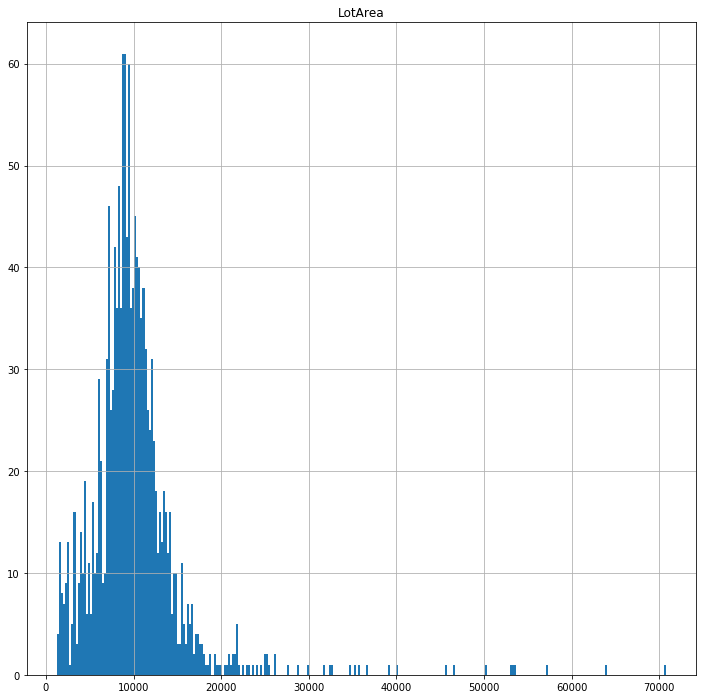

In [26]:
dfTemp.hist(column='LotArea', bins=300, figsize=(12,12))

In [61]:
YearRemodaled = dfTemp[dfTemp['YearRemodAdd'] > 1970]

In [62]:
[list(YearRemodaled).count(j) for j in unis]

[0, 0, 0]

In [27]:
X = np.array(dfTemp["LotArea"])
Y = np.array(dfTemp["SalePrice"])

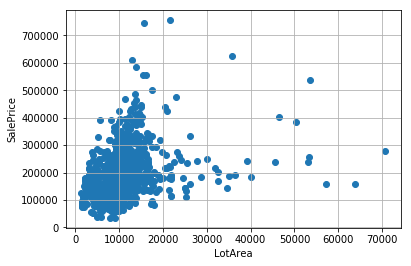

In [28]:
plt.scatter(X,Y)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.grid()

In [29]:
towns = np.array(dfTemp["Neighborhood"])

# 25 towns

In [30]:
Y = unis=np.unique(towns).tolist()
Y = np.array(Y)

In [31]:
[list(towns).count(j) for j in unis]

[17,
 2,
 16,
 58,
 26,
 150,
 51,
 100,
 79,
 37,
 17,
 49,
 225,
 9,
 73,
 41,
 77,
 113,
 25,
 74,
 59,
 86,
 25,
 36,
 11]

In [32]:
classvals=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

In [33]:
Y=[classvals[unis.index(x)] for x in towns]
print(Y)
Y=np.array(Y)

[5, 24, 5, 6, 15, 11, 21, 14, 17, 3, 19, 16, 19, 5, 12, 3, 12, 19, 20, 12, 16, 9, 5, 10, 19, 16, 12, 16, 12, 3, 9, 19, 5, 12, 16, 16, 5, 12, 12, 7, 12, 23, 20, 5, 12, 16, 11, 21, 17, 19, 8, 3, 9, 24, 12, 12, 21, 5, 22, 5, 20, 9, 16, 17, 5, 16, 12, 5, 17, 4, 12, 11, 8, 12, 17, 10, 12, 3, 19, 17, 12, 11, 21, 12, 8, 15, 8, 21, 9, 5, 12, 12, 6, 17, 5, 8, 5, 7, 7, 12, 14, 20, 20, 5, 9, 21, 17, 17, 9, 14, 7, 8, 5, 6, 6, 21, 19, 7, 20, 5, 4, 9, 12, 20, 14, 9, 13, 17, 12, 12, 12, 8, 12, 23, 19, 14, 12, 11, 5, 5, 12, 5, 12, 5, 19, 7, 3, 8, 20, 3, 5, 16, 14, 4, 17, 7, 12, 23, 21, 8, 24, 16, 16, 17, 17, 7, 4, 16, 8, 23, 17, 12, 22, 12, 23, 7, 4, 19, 22, 17, 21, 6, 7, 17, 3, 17, 11, 17, 20, 22, 6, 12, 5, 7, 5, 13, 21, 12, 17, 16, 7, 11, 17, 5, 17, 8, 19, 12, 20, 12, 7, 7, 21, 5, 5, 12, 5, 17, 6, 0, 5, 8, 14, 12, 16, 2, 15, 2, 19, 0, 12, 15, 2, 5, 8, 2, 5, 20, 16, 7, 21, 17, 17, 20, 20, 14, 17, 12, 5, 3, 6, 20, 12, 12, 8, 21, 5, 5, 17, 12, 5, 19, 17, 17, 14, 8, 18, 9, 7, 21, 4, 15, 12, 11, 3, 11, 8

In [34]:
X=np.array(dfTemp[["LotArea","SalePrice"]])
X[:5]

array([[  8450, 208500],
       [  9600, 181500],
       [ 11250, 223500],
       [  9550, 140000],
       [ 14260, 250000]])

# https://matplotlib.org/3.1.0/api/markers_api.html
goodluck...

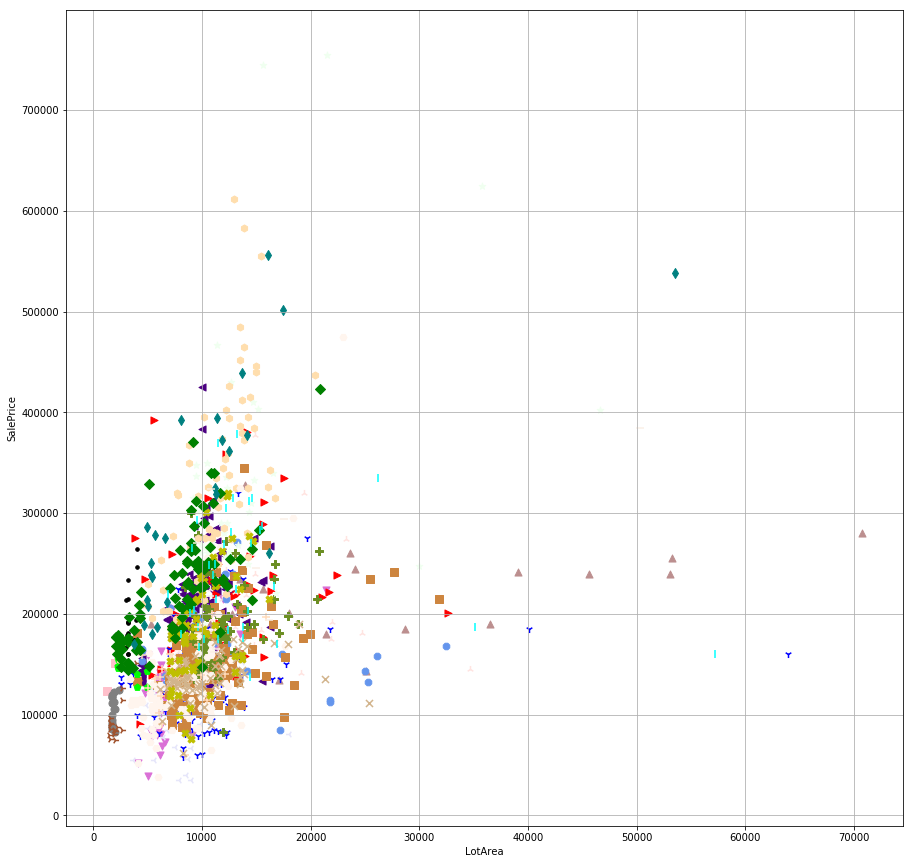

In [35]:
colors=["black","pink","grey","orchid","rosybrown","indigo","red","b","mistyrose","lavender","sienna","cornflowerblue","peru","lime","olivedrab","honeydew","navajowhite","seashell","peachpuff","tan","y","g","teal","cyan","linen"]
markers=[".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
nclasses=25
for i in range(nclasses):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=50)
    
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.grid()
plt.gcf().set_size_inches(15,15)

(OldTown) h = Seashell :: (Somerst) d = g :: (IDOTRR) 8 = cornflowerblue

In [36]:
YTown = dfTemp.loc[(dfTemp["Neighborhood"].isin(['BrkSide','Somerst','OldTown']))]
X1 = np.array(YTown[["LotArea","SalePrice"]])

In [37]:
YTown = dfTemp.loc[(dfTemp["Neighborhood"].isin(['BrkSide','Somerst','OldTown']))]
YTown = np.array(YTown["Neighborhood"])

In [38]:
unis=np.unique(YTown).tolist()
unis

['BrkSide', 'OldTown', 'Somerst']

In [39]:
[list(YTown).count(j) for j in unis]

[58, 113, 86]

In [40]:
classvals1=[0,1,2]

In [41]:
Y1=[classvals1[unis.index(x)] for x in YTown]
print(Y1)
Y1=np.array(Y1)

[2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2]


In [42]:
np.unique(dfTemp["Neighborhood"]).tolist()

['Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

# BrkSide, Somerst, OldTown

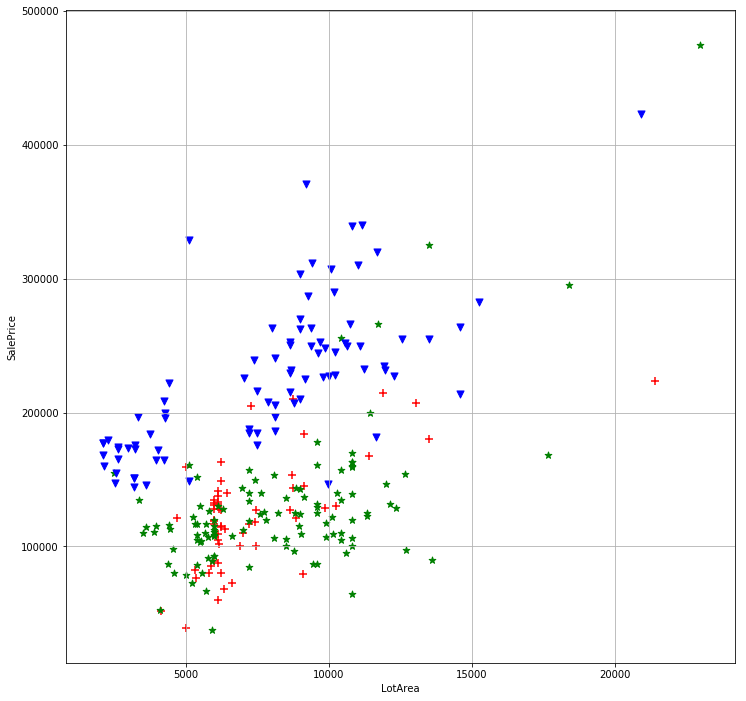

In [43]:
colors=["r","g","b"]
markers=["+","*","v"]
nclasses=3
for i in range(nclasses):
    x,y=zip(*X1[Y1==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=50)
    
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.grid()
plt.gcf().set_size_inches(12,12)

In [44]:
dfTemp.drop(['YrSold','HouseStyle','MSZoning','LandContour','BldgType','KitchenQual','GarageType','SaleType','SaleCondition'], axis=1, inplace=True)

In [45]:
dfTemp.head(1)

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PoolQC,MoSold,SalePrice
0,8450,CollgCr,7,5,2003,2003,Y,2,1,8,0,2,NaN,2,208500


In [46]:
dfTemp.dtypes

LotArea          int64
Neighborhood    object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
CentralAir      object
FullBath         int64
HalfBath         int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
PoolQC          object
MoSold           int64
SalePrice        int64
dtype: object

In [47]:
(dfTemp[dfTemp.isnull().any(axis=1)]).head(3)

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PoolQC,MoSold,SalePrice
0,8450,CollgCr,7,5,2003,2003,Y,2,1,8,0,2,NaN,2,208500
1,9600,Veenker,6,8,1976,1976,Y,2,0,6,1,2,NaN,5,181500
2,11250,CollgCr,7,5,2001,2002,Y,2,1,6,1,2,NaN,9,223500


In [48]:
dfTemp = (dfTemp.fillna(0))

In [49]:
dfTemp.loc[dfTemp['PoolQC'] != 0]

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PoolQC,MoSold,SalePrice
197,25419,NAmes,8,4,1918,1990,Y,2,0,8,1,2,Ex,3,235000
810,10140,NWAmes,6,6,1974,1999,Y,1,1,5,1,2,Fa,1,181000
1170,9880,Mitchel,6,6,1977,1977,Y,1,0,6,1,1,Gd,7,171000
1182,15623,NoRidge,10,5,1996,1996,Y,3,1,10,2,3,Ex,7,745000
1298,63887,Edwards,10,5,2008,2008,Y,2,1,12,3,2,Gd,1,160000
1386,16692,NWAmes,7,5,1978,1978,Y,3,1,12,2,2,Fa,7,250000
1423,19690,Edwards,6,7,1966,1966,Y,2,0,8,1,2,Gd,8,274970


In [50]:
dfTemp.head(3)

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PoolQC,MoSold,SalePrice
0,8450,CollgCr,7,5,2003,2003,Y,2,1,8,0,2,0,2,208500
1,9600,Veenker,6,8,1976,1976,Y,2,0,6,1,2,0,5,181500
2,11250,CollgCr,7,5,2001,2002,Y,2,1,6,1,2,0,9,223500


In [51]:
dfTemp.loc[dfTemp['CentralAir'] == 'Y', 'CentralAir'] = 1

In [52]:
dfTemp.loc[dfTemp['CentralAir'] == 'N', 'CentralAir'] = 0

In [60]:
(dfTemp.loc[dfTemp['CentralAir'] != 1]).head(3)

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PoolQC,MoSold,SalePrice
29,6324,BrkSide,4,6,1927,1950,0,1,0,4,0,1,0,5,68500
30,8500,IDOTRR,4,4,1920,1950,0,1,0,6,0,1,0,7,40000
39,6040,Edwards,4,5,1955,1955,0,2,0,6,0,0,0,6,82000


# Adjusted R2
# Mean Square Prediction Error
# Regression
# Classificationm